In [1]:
%pylab inline

import numpy as np

from sklearn.cluster import KMeans, Birch, DBSCAN
from sklearn import preprocessing

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.colors as colors
from itertools import cycle

def plotClustering(X, plt_labels, plot_noise=False):
    plt_colors = cycle(colors.cnames.keys())

    plt_K = np.unique(plt_labels).size

    for k in xrange(plt_K):
        color = plt_colors.next()
        mask = (plt_labels == k)
        plt.scatter(X[mask, 0], X[mask, 1], c=color, edgecolors='none')
    
    if plot_noise:
        mask = (plt_labels == -1)
        plt.scatter(X[mask, 0], X[mask, 1], marker='x', c='r', alpha=0.8)

    plt.show()

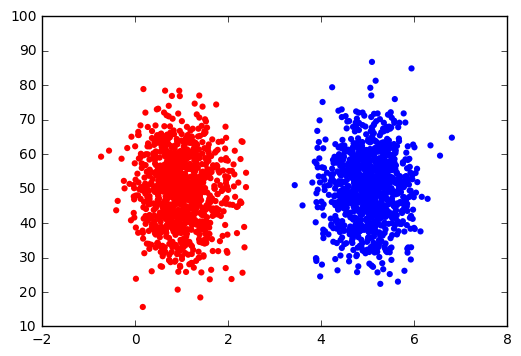

In [3]:
g1 = np.array([np.random.normal(1, 0.5, 1000), np.random.normal(50, 10, 1000)]).T
g2 = np.array([np.random.normal(5, 0.5, 1000), np.random.normal(50, 10, 1000)]).T

scatter(g1[:, 0], g1[:, 1], c='r', edgecolors='none')
scatter(g2[:, 0], g2[:, 1], c='b', edgecolors='none')

# K-Means

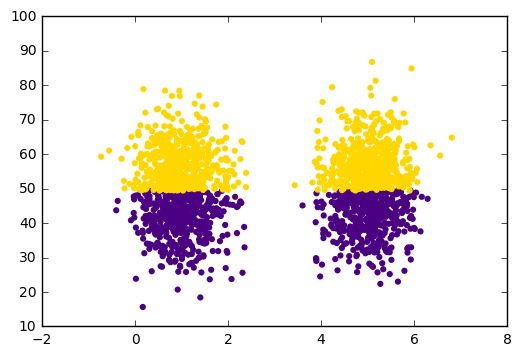

In [4]:
data = np.vstack((g1, g2))

k_means = KMeans(init='k-means++', n_clusters=2, n_init=1)
k_means.fit(data)

plotClustering(data, k_means.labels_)

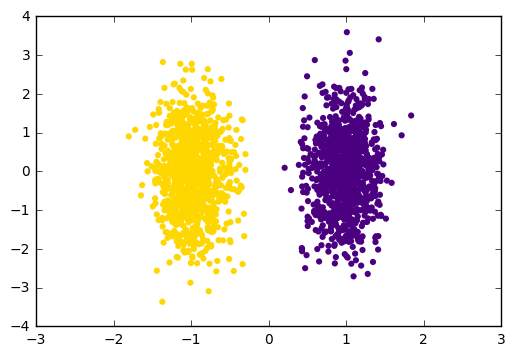

In [5]:
std_scaler = preprocessing.StandardScaler()
normalized_data = std_scaler.fit_transform(data)

k_means = KMeans(init='k-means++', n_clusters=2, n_init=1)
k_means.fit(normalized_data)

plotClustering(normalized_data, k_means.labels_)

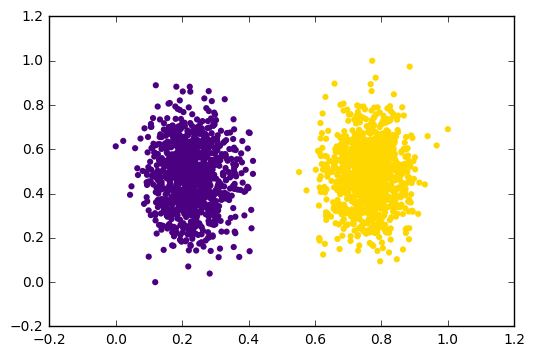

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
standarized_data = min_max_scaler.fit_transform(data)

k_means = KMeans(init='k-means++', n_clusters=2, n_init=1)
k_means.fit(standarized_data)

plotClustering(standarized_data, k_means.labels_)

# DBScan

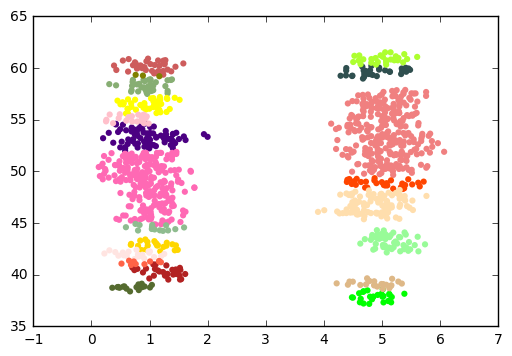

In [21]:
dbscan = DBSCAN(eps=0.45, min_samples=15)
dbscan.fit(data)

plotClustering(data, dbscan.labels_)

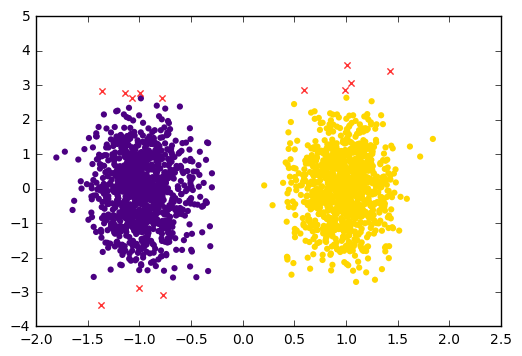

In [8]:
dbscan = DBSCAN(eps=0.5, min_samples=25)
dbscan.fit(normalized_data)

plotClustering(normalized_data, dbscan.labels_, plot_noise=True)

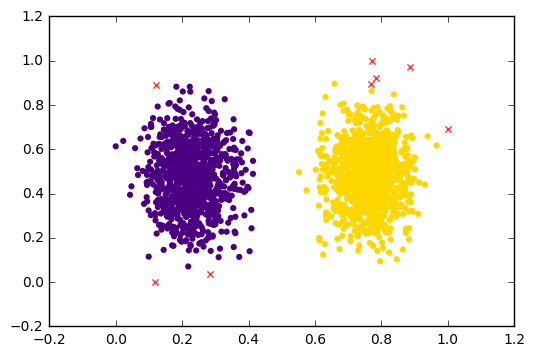

In [9]:
dbscan = DBSCAN(eps=0.10, min_samples=25)
dbscan.fit(standarized_data)

plotClustering(standarized_data, dbscan.labels_, plot_noise=True)

# Birch

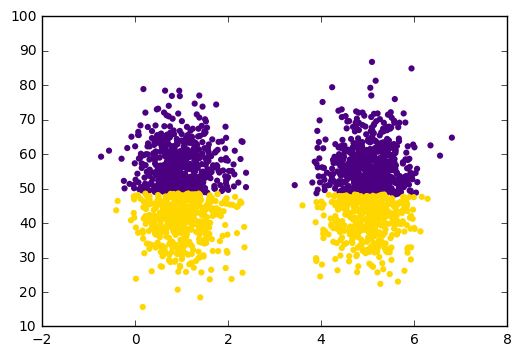

In [10]:
birch = Birch(threshold=1.5, n_clusters=2)
birch.fit(data)

plotClustering(data, birch.labels_)

True


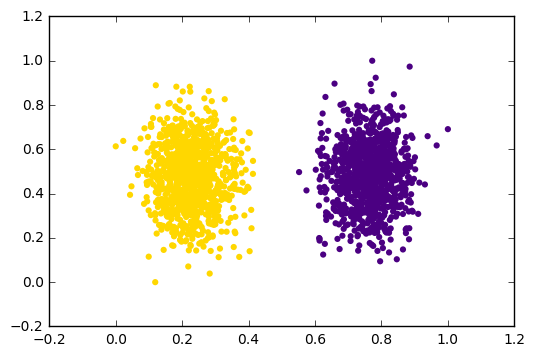

In [11]:
birch = Birch(threshold=0.1, n_clusters=2)
birch.fit(standarized_data)
print birch.root_.is_leaf

plotClustering(standarized_data, birch.labels_)

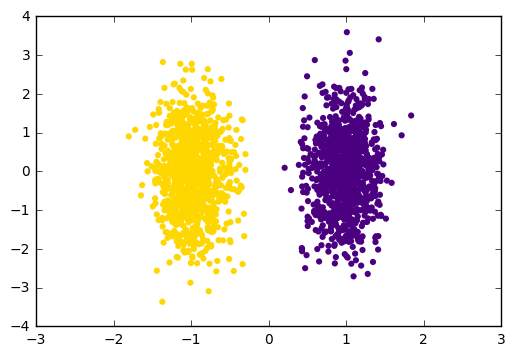

In [17]:
birch = Birch(threshold=1.1, n_clusters=2)
birch.fit(normalized_data)

plotClustering(normalized_data, birch.labels_)